In [1]:
import os
import sys
src = os.path.abspath(os.path.join('../'))
if src not in sys.path:
    sys.path.append(src)

In [2]:
from data import utils

In [3]:
rootdir = os.path.join('../../')
datadir = os.path.join(rootdir, 'data')
dataraw = os.path.join(datadir, 'raw')
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'
filename = utils.fetch_data(url, dataraw)
if filename is not None:
    utils.extract_tarfile(dataraw, filename)

In [4]:
import numpy as np
import pandas as pd

In [5]:
raw_datafile = os.path.join(dataraw, 'housing.csv')
df = pd.read_csv(raw_datafile)

In [6]:
df['id'] = df['longitude']*1000 + df['latitude']

In [7]:
df.set_index('id')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
id,,,,,,,,,,
-122192.12,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122182.14,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122202.15,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122212.15,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122212.15,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
-121050.52,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
-121170.51,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
-121180.57,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
id                    20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

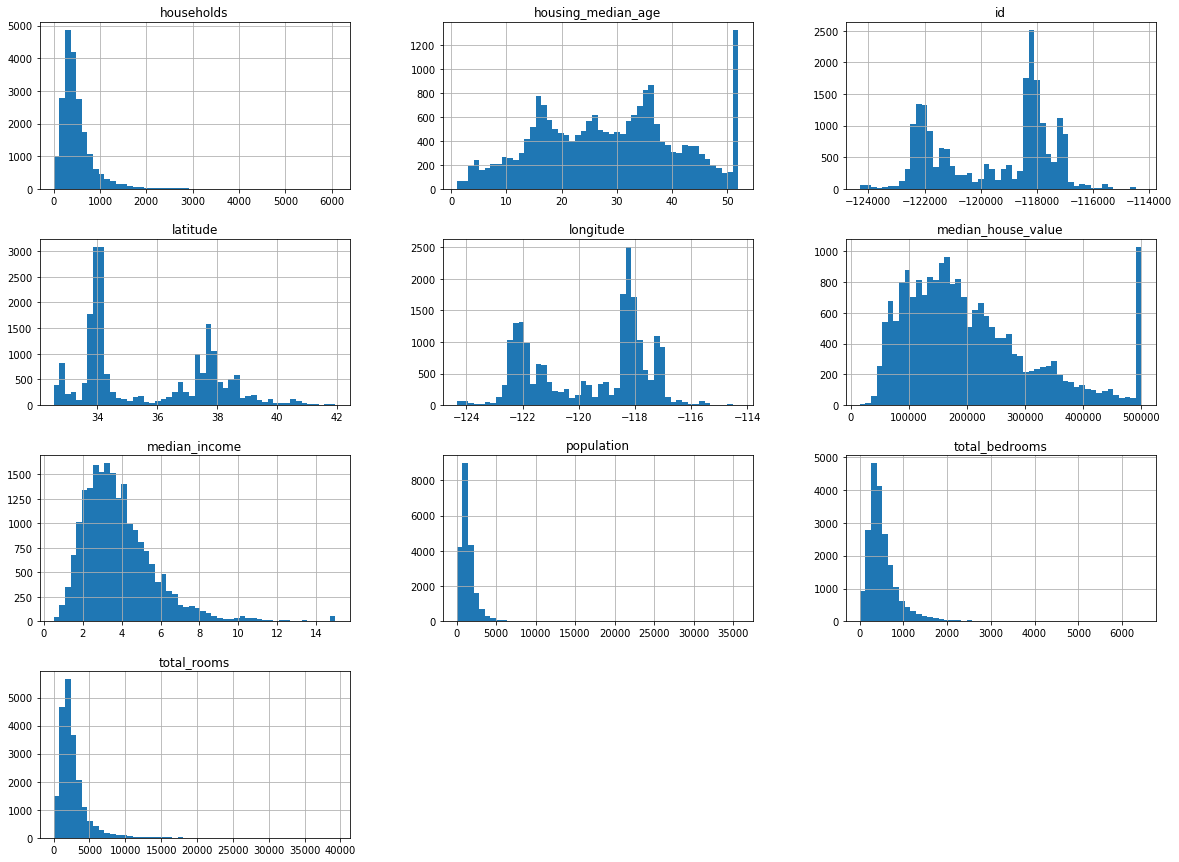

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
(train_df, test_df) = train_test_split(df, test_size=0.2, random_state=66)

In [12]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17008 to 8823
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16353 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
id                    16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 11084 to 9396
Data columns (total 11 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4080 non-null float64
population

In [13]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
17008,-122.29,37.54,41.0,1743.0,349.0,811.0,349.0,4.9464,282400.0,NEAR OCEAN,-122252.46
20111,-120.20,37.80,30.0,1189.0,255.0,446.0,165.0,3.4838,112500.0,INLAND,-120162.20
8199,-118.14,33.79,23.0,2573.0,688.0,1478.0,604.0,3.4833,209400.0,NEAR OCEAN,-118106.21
19553,-121.00,37.62,28.0,1153.0,420.0,1043.0,357.0,1.0801,75000.0,INLAND,-120962.38
8429,-118.36,33.92,46.0,1231.0,231.0,793.0,256.0,4.1023,226800.0,<1H OCEAN,-118326.08
...,...,...,...,...,...,...,...,...,...,...,...
9165,-118.43,34.42,13.0,3600.0,580.0,1799.0,576.0,6.2971,218300.0,<1H OCEAN,-118395.58
5199,-118.28,33.93,21.0,847.0,278.0,1283.0,277.0,1.4329,94100.0,<1H OCEAN,-118246.07
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,412300.0,<1H OCEAN,-121992.67
8243,-118.18,33.78,17.0,1419.0,436.0,1300.0,360.0,2.0769,100000.0,NEAR OCEAN,-118146.22


In [14]:
df['income_category'] = np.ceil(df.median_income/1.5)
df.income_category.where(df.income_category < 5, 5.0, inplace=True)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_category']):
    print('dupa')
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

dupa


In [15]:
strat_train_set.income_category.value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_category, dtype: float64

In [16]:
strat_test_set.income_category.value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

In [17]:
df.income_category.value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [18]:
train_df = strat_train_set
test_df = strat_test_set

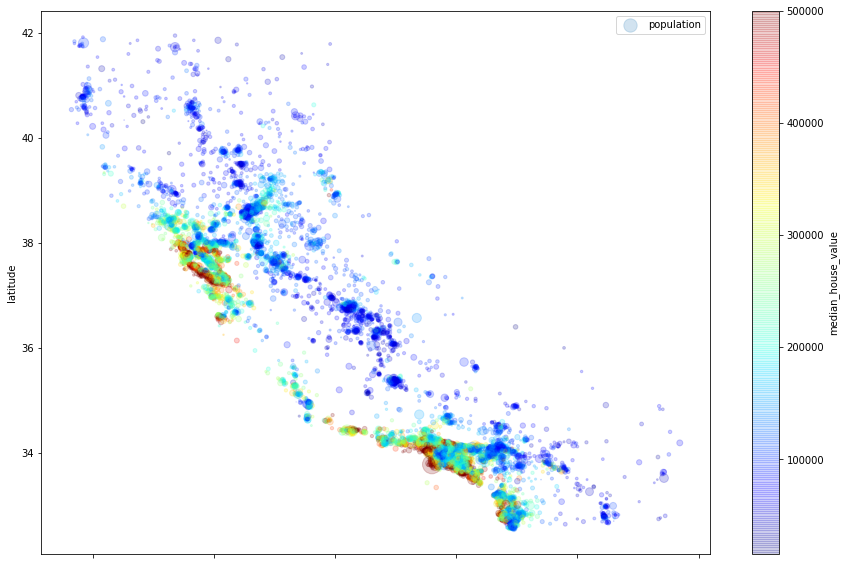

In [19]:
train_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, figsize=(15,10),
             s=df['population']/100, label='population', c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)

# Correlations

*NEW FEATURE*

In [20]:
train_df['people_per_room'] = train_df.population / train_df.total_rooms
train_df['people_per_household'] = train_df.population / train_df.households
train_df['people_per_bedroom'] = train_df.population / train_df.total_bedrooms
train_df['bedrooms_per_room'] = train_df.total_bedrooms / train_df.total_rooms

In [21]:
correlations = train_df.corr()
correlations['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687160
income_category         0.642274
total_rooms             0.135097
housing_median_age      0.114110
households              0.064506
total_bedrooms          0.047689
people_per_bedroom     -0.018041
people_per_household   -0.021985
population             -0.026920
people_per_room        -0.031079
longitude              -0.047432
id                     -0.047632
latitude               -0.142724
bedrooms_per_room      -0.259984
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1386AAF0>,
      dtype=object)

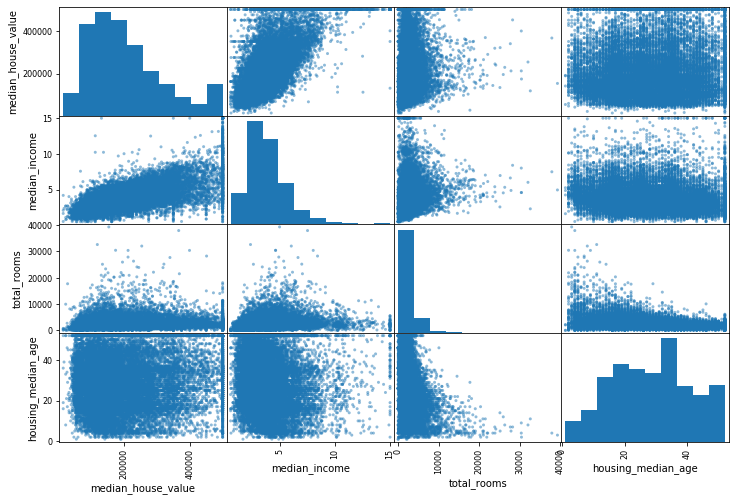

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12,8))

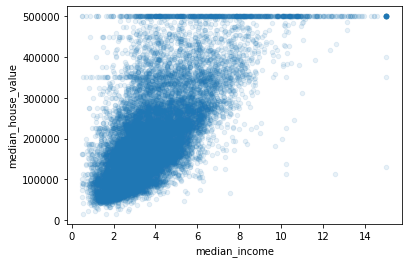

In [23]:
train_df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

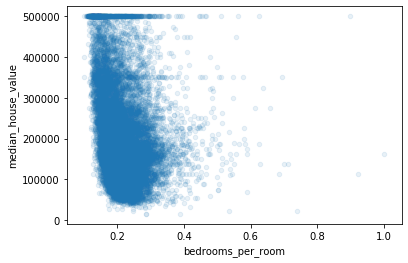

In [24]:
train_df.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.1)

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 16 columns):
longitude               16512 non-null float64
latitude                16512 non-null float64
housing_median_age      16512 non-null float64
total_rooms             16512 non-null float64
total_bedrooms          16354 non-null float64
population              16512 non-null float64
households              16512 non-null float64
median_income           16512 non-null float64
median_house_value      16512 non-null float64
ocean_proximity         16512 non-null object
id                      16512 non-null float64
income_category         16512 non-null float64
people_per_room         16512 non-null float64
people_per_household    16512 non-null float64
people_per_bedroom      16354 non-null float64
bedrooms_per_room       16354 non-null float64
dtypes: float64(15), object(1)
memory usage: 2.1+ MB


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
cat_attributes = ["ocean_proximity"]
train_df_num = train_df.drop(cat_attributes, axis=1)
imputer.fit(train_df_num)
train_df_num = pd.DataFrame(imputer.transform(train_df_num), columns=train_df_num.columns)

In [27]:
train_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 15 columns):
longitude               16512 non-null float64
latitude                16512 non-null float64
housing_median_age      16512 non-null float64
total_rooms             16512 non-null float64
total_bedrooms          16512 non-null float64
population              16512 non-null float64
households              16512 non-null float64
median_income           16512 non-null float64
median_house_value      16512 non-null float64
id                      16512 non-null float64
income_category         16512 non-null float64
people_per_room         16512 non-null float64
people_per_household    16512 non-null float64
people_per_bedroom      16512 non-null float64
bedrooms_per_room       16512 non-null float64
dtypes: float64(15)
memory usage: 1.9 MB


In [28]:
from data import feature_engineering as fe

fe.enc_cat_features_one_hot(train_df, feature_names=['ocean_proximity'])
train_df

ocean_proximity


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id,income_category,people_per_room,people_per_household,people_per_bedroom,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,-121852.71,2.0,0.452806,2.094395,2.022792,0.223852,1.0,0.0,0.0,0.0,0.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,-121892.95,5.0,0.450663,2.707965,2.833333,0.159057,1.0,0.0,0.0,0.0,0.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,-117167.23,2.0,0.479508,2.025974,1.987261,0.241291,0.0,0.0,0.0,0.0,1.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,-119573.69,2.0,0.790471,4.135977,3.935310,0.200866,0.0,1.0,0.0,0.0,0.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,-118555.77,3.0,0.676426,3.047847,2.923934,0.231341,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,-118095.80,4.0,0.450826,2.728571,2.427966,0.185681,0.0,1.0,0.0,0.0,0.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,-117526.12,2.0,0.879599,4.077519,3.578231,0.245819,0.0,1.0,0.0,0.0,0.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,-116365.91,3.0,0.432132,2.742484,2.405963,0.179609,0.0,1.0,0.0,0.0,0.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,-117976.18,3.0,0.691837,3.808989,3.568421,0.193878,1.0,0.0,0.0,0.0,0.0
